In [2]:
import importlib
import numpy as np

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

import gridify as gy
importlib.reload(gy)



<module 'gridify' from '/home/hj/cluster-ambiguity/cambiguity/gridify.py'>

In [3]:
X, y = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

/home/hj/anaconda3/envs/cambiguity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hj/anaconda3/envs/cambiguity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


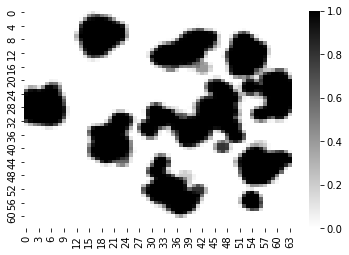

In [6]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 30, 1024, 64)
sns.heatmap(X_tsne_grid, cmap='binary')

plt.show()

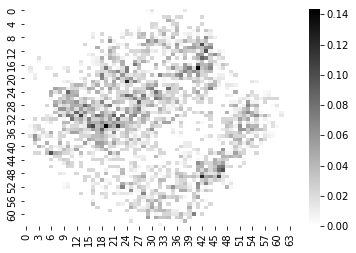

In [5]:
X_pca_grid = gy.gridify(X_pca, 0.2, 3, 1024, 64)
sns.heatmap(X_pca_grid, cmap='binary')

plt.show()